# 一、乳腺癌数据聚类分析

## 1.数据集导入与数据预处理

In [1]:
#导入库并加载数据
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
X = data.data
y = data.target

In [2]:
from sklearn.preprocessing import StandardScaler
#标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
#预览数据
from numpy import nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
#描述性分析
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

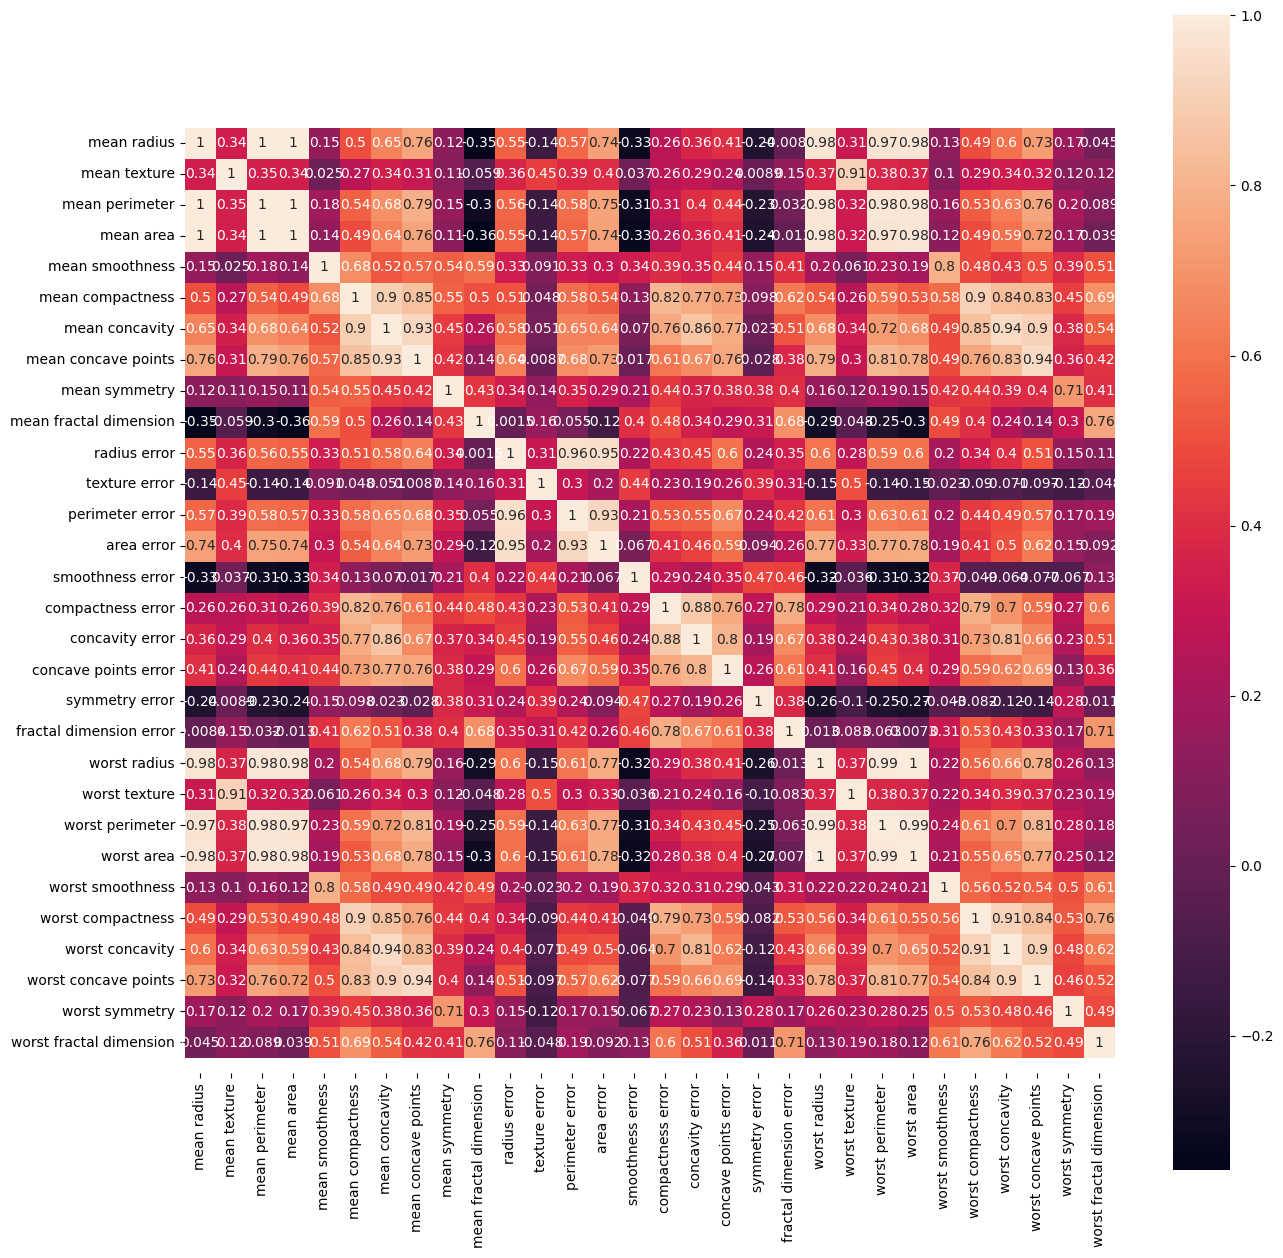

In [5]:
#查看特征之间的相关性
import seaborn as sns
pearson_mat=df.corr(method='spearman')
plt.figure(figsize=(15,15))
ax=sns.heatmap(pearson_mat,square=True,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [6]:
#查看缺失值
num_missing = df.isnull().sum()
print(num_missing)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


## 2.聚类算法实现

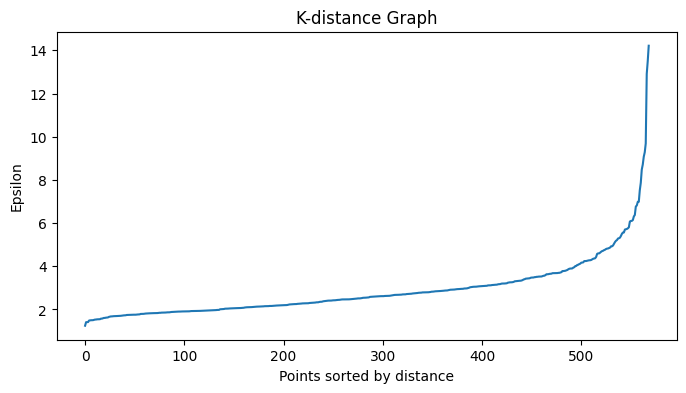

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
# 层次聚类
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

# 使用k-distance图确定DBSCAN的eps参数
from sklearn.neighbors import NearestNeighbors

def find_eps(X, min_samples):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, min_samples-1], axis=0)
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.title('K-distance Graph')
    plt.show()

find_eps(X_scaled, min_samples=5)

# 根据k-distance图选择eps=3.0
dbscan = DBSCAN(eps=3.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

## 3.聚类效果可视化实现

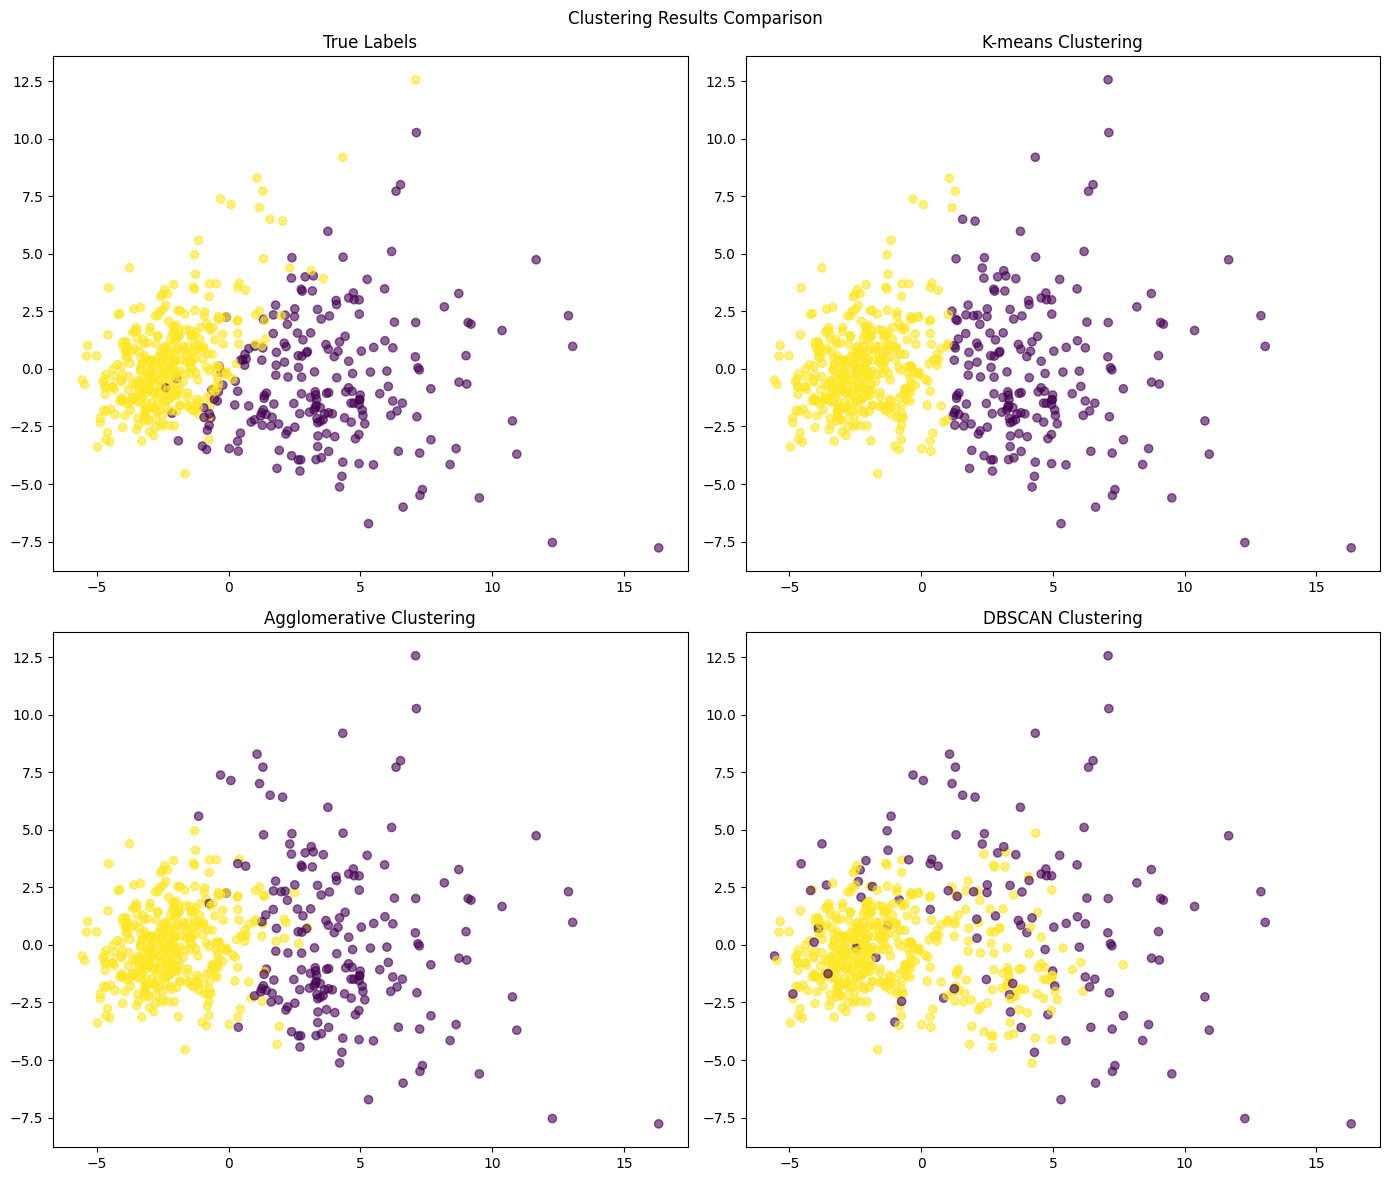

In [8]:
from sklearn.decomposition import PCA

# PCA降维用于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Clustering Results Comparison')

# 真实标签
axes[0,0].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.6)
axes[0,0].set_title('True Labels')

# K-means
axes[0,1].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0,1].set_title('K-means Clustering')

# 层次聚类
axes[1,0].scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='viridis', alpha=0.6)
axes[1,0].set_title('Agglomerative Clustering')

# DBSCAN
axes[1,1].scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='viridis', alpha=0.6)
axes[1,1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

## 4.聚类效果评估

In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 计算评估指标
print("K-means Performance:")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, kmeans_labels):.3f}")
print(f"Normalized Mutual Info: {normalized_mutual_info_score(y, kmeans_labels):.3f}\n")

print("Agglomerative Clustering Performance:")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, agg_labels):.3f}")
print(f"Normalized Mutual Info: {normalized_mutual_info_score(y, agg_labels):.3f}\n")

print("DBSCAN Performance:")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, dbscan_labels):.3f}")
print(f"Normalized Mutual Info: {normalized_mutual_info_score(y, dbscan_labels):.3f}")

K-means Performance:
Adjusted Rand Index: 0.677
Normalized Mutual Info: 0.562

Agglomerative Clustering Performance:
Adjusted Rand Index: 0.575
Normalized Mutual Info: 0.457

DBSCAN Performance:
Adjusted Rand Index: 0.128
Normalized Mutual Info: 0.075


由可视化结果与评估数据可见，三种聚类算法中K-Means表现最好，层次聚类紧随其后，DBSCAN性能略低，存在噪声点，对这个数据集的聚类效果最差。

# 二、手动编写聚类算法
### 本处首先复现K-Means算法,选用iris数据集进行测试,借鉴了csdn上的技术帖  
#### 作者博客链接https://zhangkaifang.blog.csdn.net/
                        
#### 原文链接：https://blog.csdn.net/abc13526222160/article/details/96482592

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [13]:
#加载数据
iris=load_iris()
#pd.DataFrame(data.data,columns=data.feature_names)
data=pd.DataFrame(iris.data,columns=iris.feature_names)
X=iris.data
y=iris.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
#计算欧氏距离
def dist(arrA,arrB):
    dist=np.sum(arrA-arrB,axis=1)
    return dist

In [15]:
#随机生成质心
def randCent(dataSet,k):
    n=dataSet.shape
    data_min=dataSet.iloc[:,:n-1].min()
    data_max=dataSet.iloc[:,:n-1].max()
    data_cent=bp.random.uniform(data_min,data_max,(k,n-1))
    return data_cent

In [24]:
import numpy as np
import pandas as pd

#完整手动实现
def KMeans(dataSet, k, distMeas, creatCent):
    # 确保输入是二维结构
    if isinstance(dataSet, pd.DataFrame):
        m, n = dataSet.shape
    else:
        dataSet = pd.DataFrame(dataSet)
        m, n = dataSet.shape

    # 初始化质心
    centroids = creatCent(dataSet, k)
    
    # 创建存储结构（距离/当前簇/上次簇）
    clusterAssment = np.zeros((m, 3))
    clusterAssment[:, 0] = np.inf  # 最小距离初始化为无穷大
    clusterAssment[:, 1:3] = -1    # 簇索引初始化为-1

    # 合并原始数据和簇信息
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index=True)

    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            # 获取特征向量（修正点1：使用所有n个特征）
            features = result_set.iloc[i, :n].values
            
            # 计算到所有质心的距离（修正点2：确保向量化计算）
            distances = [distMeas(features, centroid) for centroid in centroids]
            
            # 找到最小距离和对应簇索引
            min_dist = np.min(distances)
            min_index = np.argmin(distances)
            
            # 更新结果集（修正点3：正确列索引）
            result_set.iloc[i, n] = min_dist
            result_set.iloc[i, n+1] = min_index

        # 判断是否收敛（修正点4：比较最后两列）
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()

        if clusterChanged:
            # 计算新质心（修正点5：取前n列特征）
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:, :n].values
            
            # 保存当前簇分配结果
            result_set.iloc[:, -1] = result_set.iloc[:, -2]

    return centroids, result_set

# 辅助函数定义
def randCent(dataSet, k):
    """随机初始化质心"""
    n = dataSet.shape[1]
    centroids = np.zeros((k, n))
    for j in range(n):
        min_val = dataSet.iloc[:, j].min()
        max_val = dataSet.iloc[:, j].max()
        centroids[:, j] = np.random.uniform(min_val, max_val, size=k)
    return centroids

def distEuclidean(a, b):
    """欧氏距离计算"""
    return np.linalg.norm(a - b)

# 使用示例
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 运行修正后的算法
final_centroids, final_result = KMeans(
    dataSet=X,
    k=3,
    distMeas=distEuclidean,
    creatCent=randCent
)

# 对比sklearn结果
from sklearn.cluster import KMeans as SkKMeans
sk_kmeans = SkKMeans(n_clusters=3).fit(X)
print("手动实现质心:\n", final_centroids)
print("\nSklearn质心:\n", sk_kmeans.cluster_centers_)

手动实现质心:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Sklearn质心:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


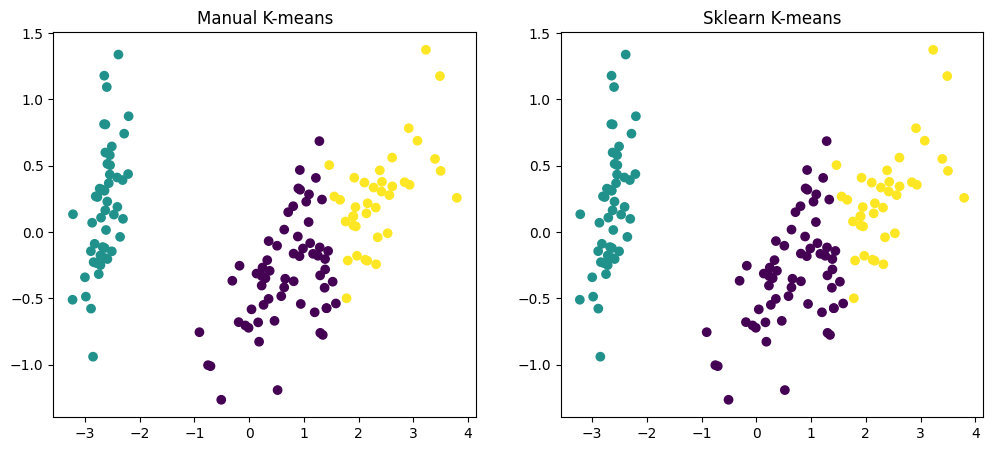

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 降维可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

# 手动结果
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=final_result.iloc[:, -2])
plt.title("Manual K-means")

# Sklearn结果
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=sk_kmeans.labels_)
plt.title("Sklearn K-means")

plt.show()

## 然后尝试手动实现DBSCAN
#### 参考csdn技术博客帖
https://blog.csdn.net/DuLNode/article/details/121530429#:~:text=%E6%9C%AC%E6%96%87%E8%AF%A6%E7%BB%86%E4%BB%8B%E7%BB%8D%E4%BA%86DBSCAN%E8%81%9A%E7%B1%BB%E7%AE%97%E6%B3%95%E7%9A%84%E5%B7%A5%E4%BD%9C%E5%8E%9F%E7%90%86%EF%BC%8C%E5%B9%B6%E6%89%8B%E5%8A%A8%E5%AE%9E%E7%8E%B0%E4%BA%86%E8%AF%A5%E7%AE%97%E6%B3%95%E7%9A%84Python%E4%BB%A3%E7%A0%81%E3%80%82%20DBSCAN%E6%97%A0%E9%9C%80%E9%A2%84%E5%85%88%E8%AE%BE%E5%AE%9A%E7%B0%87%E7%9A%84%E6%95%B0%E9%87%8F%EF%BC%8C%E8%83%BD%E8%87%AA%E5%8A%A8%E5%8F%91%E7%8E%B0%E6%95%B0%E6%8D%AE%E7%9A%84%E5%88%86%E5%B8%83%E6%83%85%E5%86%B5%E3%80%82,%E5%9C%A8%E6%B5%8B%E8%AF%95%E4%B8%AD%EF%BC%8C%E7%AE%97%E6%B3%95%E5%9C%A8sklearn%E7%9A%84make_circles%E5%92%8Cmake_moons%E6%95%B0%E6%8D%AE%E9%9B%86%E4%B8%8A%E8%A1%A8%E7%8E%B0%E8%89%AF%E5%A5%BD%E3%80%82%20DBSCAN%E9%80%82%E7%94%A8%E4%BA%8E%E4%BB%BB%E4%BD%95%E6%95%B0%E6%8D%AE%E5%88%86%E5%B8%83%EF%BC%8C%E5%85%B7%E6%9C%89%E8%BE%83%E5%A5%BD%E7%9A%84%E6%97%B6%E9%97%B4%E5%92%8C%E7%A9%BA%E9%97%B4%E6%95%88%E7%8E%87%EF%BC%8C%E5%B8%B8%E7%94%A8%E4%BA%8E%E5%BC%82%E5%B8%B8%E6%A3%80%E6%B5%8B%E5%92%8C%E6%97%A0%E6%A0%87%E7%AD%BE%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86%E3%80%82

In [1]:
from queue import Queue
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class DBSCAN:
    def __init__(self, min_samples=10, r=0.15):
        self.min_samples=min_samples #核心点所需最小邻域点数
        self.r=r  #邻域半径
        self.X = None #存储输入数据
        self.label = None #存储聚类标签
        self.n_class = 0  #聚类簇数量计数器
        
    def fit(self, X):
        self.X = X
        self.label = np.zeros(X.shape[0])
        q = Queue() #使用队列实现区域扩展
        for i in range(len(self.X)):
            #只处理未分类的点
            if self.label[i] == 0:
                q.put(self.X[i])
                if self.X[(np.sqrt(np.sum((self.X - self.X[i]) ** 2, axis=1)) <= self.r) & (self.label==0)].shape[0] >= self.min_samples:
                    self.n_class += 1 #新建簇
                #扩展邻域
                while not q.empty():
                    p = q.get()
                    neighbors = self.X[(np.sqrt(np.sum((self.X - p) ** 2, axis=1)) <= self.r) & (self.label==0)]
                    #判断新邻域是否是核心点
                    if neighbors.shape[0] >= self.min_samples: 
                        mark = (np.sqrt(np.sum((self.X - p) ** 2, axis=1)) <= self.r)
                        self.label[mark] = np.ones(self.label[mark].shape) * self.n_class
                        # print(self.label)
                        #将新点加入队列继续扩展
                        for x in neighbors:
                            q.put(x)
                            
    def plot_dbscan_2D(self):
        plt.rcParams['font.sans-serif'] = ["SimHei"]
        plt.rcParams['axes.unicode_minus']=False
        for i in range(self.n_class+1):
            if i == 0:
                label = '异常数据'
            else:
                label = '第'+str(i) + '类数据'
            plt.scatter(self.X[self.label==i,0], self.X[self.label==i,1],label=label)
        plt.legend()
        plt.show()


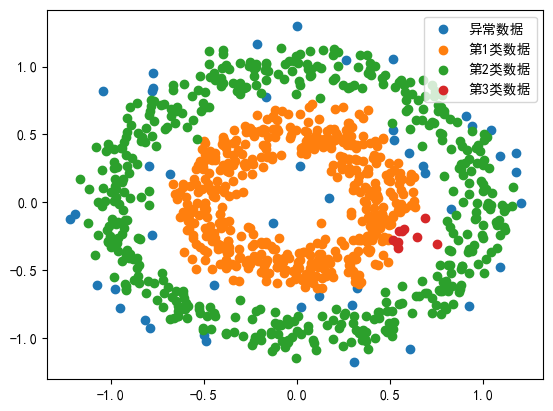

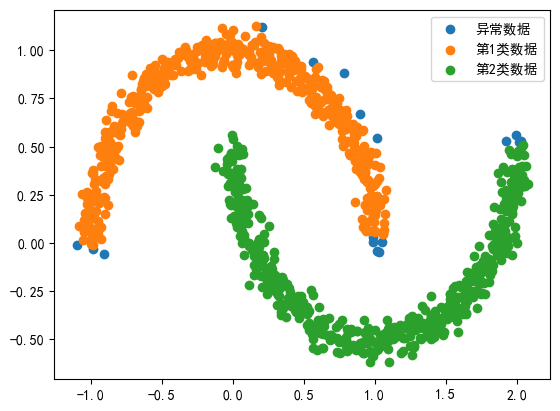

In [12]:
#手动函数效果
from sklearn.datasets import make_moons, make_circles

X,_=make_circles(n_samples=1000,factor=0.5,noise=0.1)

db = DBSCAN(4, 0.15)
db.fit(X)
db.plot_dbscan_2D()


X,_ = make_moons(n_samples=1000, noise=0.05)
db = DBSCAN(10, 0.15)
db.fit(X)
db.plot_dbscan_2D()

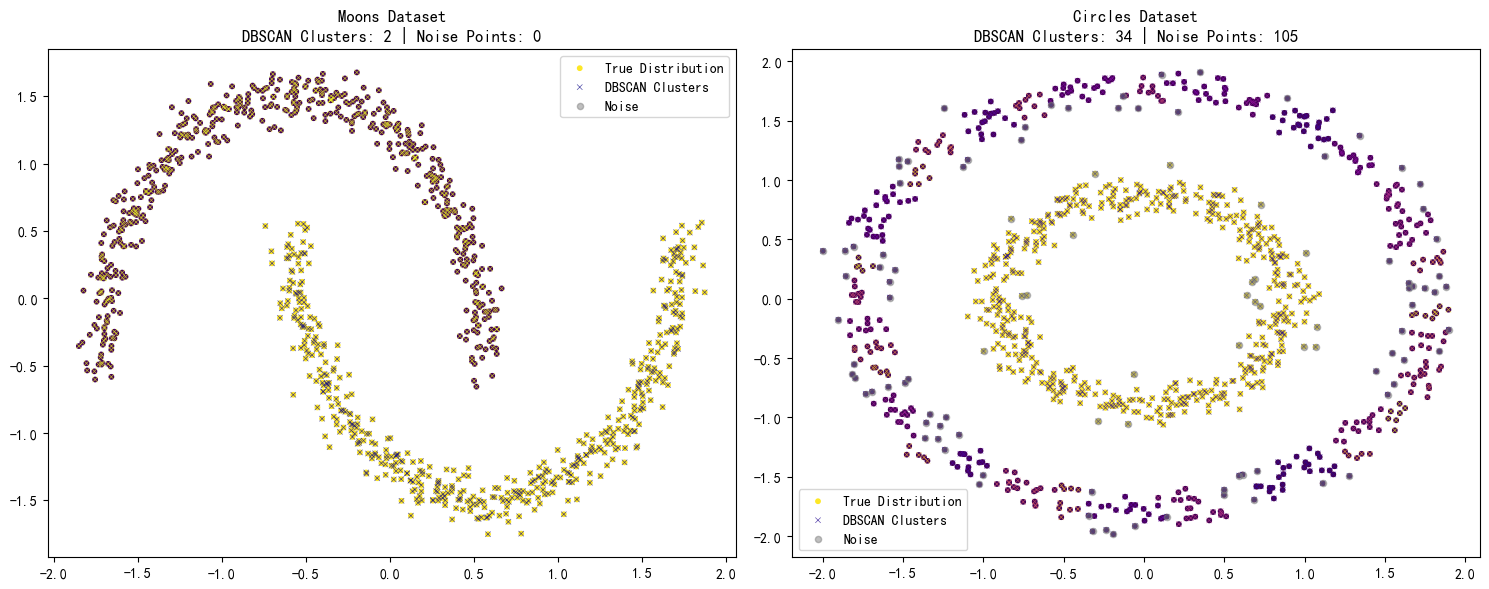

In [14]:
#内在库函数效果
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 生成数据集
datasets = {
    "Moons": make_moons(n_samples=1000, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
}

# 设置DBSCAN参数
params = {
    "Moons": {"eps": 0.2, "min_samples": 5},
    "Circles": {"eps": 0.1, "min_samples": 5}
}

plt.figure(figsize=(15, 6))

for idx, (dataset_name, (X, y)) in enumerate(datasets.items(), 1):
    # 数据标准化
    X = StandardScaler().fit_transform(X)
    
    # 创建DBSCAN模型
    dbscan = DBSCAN(**params[dataset_name])
    labels = dbscan.fit_predict(X)
    
    # 计算聚类数量（排除噪声点-1）
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # 可视化结果
    plt.subplot(1, 2, idx)
    
    # 原始数据分布
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10, label='True Distribution')
    
    # DBSCAN聚类结果
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=15, 
                marker='x', alpha=0.7, linewidth=0.5, label='DBSCAN Clusters')
    
    # 标注噪声点（label=-1）
    noise_mask = (labels == -1)
    plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='gray', 
                s=20, marker='o', alpha=0.5, label='Noise')
    
    plt.title(f"{dataset_name} Dataset\n"
              f"DBSCAN Clusters: {n_clusters} | Noise Points: {sum(noise_mask)}")
    plt.legend()

plt.tight_layout()
plt.show()